In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy.optimize import curve_fit
import glob


data_folder1 = '/Users/jasonvdv/Desktop/lsa-ast361/Work/jasonvdv/Lab7/radio-astronomy-lab-7/sun_azimuth/'
data_folder2 = '/Users/jasonvdv/Desktop/lsa-ast361/Work/jasonvdv/Lab7/radio-astronomy-lab-7/sun_elevation/'

az_files = glob.glob(data_folder1 + "sun*") 
az_files.sort()

el_files = glob.glob(data_folder2 + "sun*") 
el_files.sort()

az_spectra = [] #Create Az Spectrum Array 


In the above cell we read in all of the data and sort them using glob

In [2]:
for az_file in az_files: 
    
    with open(az_file) as az_data: 
        
        spectrum_rows1 = []    
        
        for j, row in enumerate(az_data, start=1): 
            if j%4 == 0: 
                spectrum_rows1.append(row) 
                
        tot_spectrum1 = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows1: 
            temp_spec1 = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec1 = [] # Create an empty list to hold the spectral data
            for val1 in temp_spec1: # Iterate over the elements of your split list.
                if val1 != '' and val1 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec1.append(val1) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum1 = tot_spectrum1 + np.float64(spec1) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum1)
        

el_spectra = [] #Create El Spectrum Array 

for el_file in el_files: 
    
    with open(el_file) as el_data: 
        
        spectrum_rows2 = []    
        
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0: 
                spectrum_rows2.append(row) 
                
        tot_spectrum2 = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows2: 
            temp_spec2 = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec2 = [] # Create an empty list to hold the spectral data
            for val2 in temp_spec2: # Iterate over the elements of your split list.
                if val2 != '' and val2 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec2.append(val2) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum2 = tot_spectrum2 + np.float64(spec2) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum2)
# for i in range(0,len(el_files)):
#      print(el_files[i])

In [11]:
frequency = np.arange(1416,1426,0.009766)

#Azimuth Data
#labels below give the order the files are arranged in the arrays
label_az = ['Azimuth: -1','Azimuth: -2','Azimuth: -3','Azimuth: -4','Azimuth: -5','Azimuth: -6',
            'Azimuth: -7','Azimuth: -8','Azimuth: -9','Azimuth: 0','Azimuth: 10',
            'Azimuth: 1','Azimuth: 2','Azimuth: 3','Azimuth: 4','Azimuth: 5', 
            'Azimuth: 6','Azimuth: 7','Azimuth: 8','Azimuth: 9']
label_el = ['Elevation: -1','Elevation: -2','Elevation: -3','Elevation: -4','Elevation: -5'
           ,'Elevation: 1','Elevation: 10','Elevation: 2','Elevation: 3','Elevation: 4',
           'Elevation: 5','Elevation: 6','Elevation: 7','Elevation: 8',
           'Elevation: 9']
for i in range(len(az_spectra)):
    az_spectra_range = az_spectra[i][15:]
    plt.plot(frequency[15:],az_spectra_range, label = label_az[i]) 
plt.title('Figure 1: Azimuth Flux vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.legend(fontsize = 'x-small')
plt.show()

Figure 1. This linear plot shows relative flux vs frequency for the azimuthal scans of the sun. From this plot, we can easily see that we should not include the early spike in the data in our integration of solar flux, so we remove it from the plot by skipping the relevant indices.

In [12]:
#Elevation Data
for j in range(len(el_spectra)):
    el_spectra_range = el_spectra[j][15:]
    plt.plot(frequency[15:],el_spectra_range, label = label_el[j])
plt.title('Figure 2: Elevation Flux vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux')
plt.legend(loc = 'best', fontsize = 'x-small')
plt.show()

Figure 2. This linear plot shows relative flux vs frequency for the elevation scans of the sun. Again, from this plot, we can easily see that we should not include the early spike in the data in our integration of solar flux and once again we remove it.

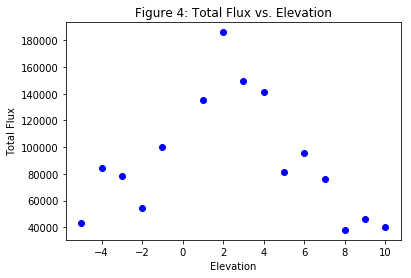

In [14]:
az_array = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]
el_array = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]

total_flux_azimuth = np.trapz(az_spectra, frequency)
plt.scatter(az_array, total_flux_azimuth, color = 'r')
plt.title('Figure 3: Total Flux vs. Azimuth')
plt.xlabel('Azimuth')
plt.ylabel('Total Flux')
plt.show()

total_flux_el = np.trapz(el_spectra, frequency)
plt.scatter(el_array, total_flux_el, color = 'blue')
plt.title('Figure 4: Total Flux vs. Elevation')
plt.xlabel('Elevation')
plt.ylabel('Total Flux')
plt.show()

On Figure 3 and Figure 4 we plot azimuth and elevation versus total flux, respectively. We see a general relationship between azimuth and elevation with flux in the shape of a normal distribution. We will next take these data and fit them using a Gaussian. 

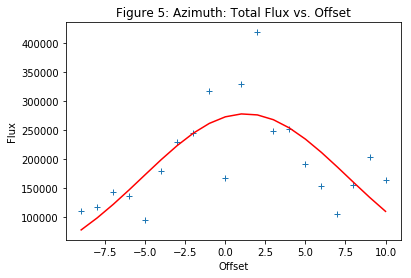

('Our FWHM for the Azimuth data is', 15.112317569346736, 'degrees')


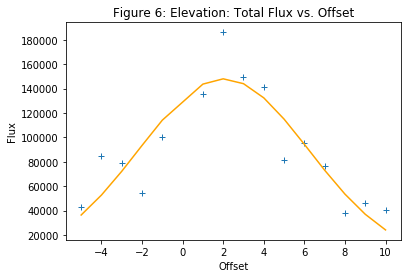

('Our FWHM for the Elevation data is', 9.8709788328681, 'degrees')


In [15]:
#in our function for the gaussian a is the standard deviation,
#b is the mean, and c is the amplitude 
pi = (2*np.pi)**0.5
def gaus (x,a,b,c):
    return (c/(a*pi))*np.exp((-0.5)*((x-b)/a)**2)

#Guess for Azimuth ICs
a0,b0,c0 = (4,0,35000)
xvals1 = np.array(az_array)
yvals1 = total_flux_azimuth

coeffs, fiterr = curve_fit(gaus, xvals1, yvals1, p0=(a0,b0,c0))
            
plt.plot(xvals1,yvals1, '+')
plt.plot(np.sort(xvals1),gaus(np.sort(xvals1),coeffs[0], coeffs[1], coeffs[2]), 'r')
plt.xlabel('Offset')
plt.ylabel('Flux')
plt.title('Figure 5: Azimuth: Total Flux vs. Offset')
plt.show()

FWHM_az = 2.3548*coeffs[0]
print("Our FWHM for the Azimuth data is", FWHM_az, "degrees")

#in our function for the gaussian d is the standard deviation,
#e is the mean, and f is the amplitude
def gaus2 (z,d,e,f):
    return (f/(d*pi))*np.exp((-0.5)*((z-e)/d)**2)

#Guess for Elevation ICs
d0,e0,f0 = (4,0,160000)
xvals2 = np.array(el_array)
yvals2 = total_flux_el

coeffs, fiterr = curve_fit(gaus2, xvals2, yvals2, p0=(d0,e0,f0))

plt.plot(xvals2,yvals2, '+')
plt.plot(np.sort(xvals2),gaus2(np.sort(xvals2),coeffs[0], coeffs[1], coeffs[2]), 'orange')
plt.title('Figure 6: Elevation: Total Flux vs. Offset')
plt.ylabel('Flux')
plt.xlabel('Offset')
plt.show()

FWHM_el = 2.3548*coeffs[0]
print("Our FWHM for the Elevation data is", FWHM_el, "degrees")

Figures 5 and 6. In figure 5 (top), we plot the total flux data vs azimuth offset, and a gaussian fit. In figure 6 (bottom) we show the total flux data for the elevation offset, with its own gaussian fit. The fits for these two sets of data are fairly similar. The fits help us easily determine the full width half max for the curves.